# Iris flowers
## The task is to predict class of the flower (multiclass classification problem).
### Dataset [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris).

# Import libraries

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

%matplotlib inline

# Read data file

In [19]:
data = pd.read_csv('iris.csv',index_col=0)

# Descriptive statistics

In [20]:
data.head(3)

,sepal_l,sepal_w,petal_l,petal_w,class
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [21]:
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [22]:
data.shape

(150, 5)

In [23]:
data.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data seems to have similar scales, so no standardization is needed

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
sepal_l    150 non-null float64
sepal_w    150 non-null float64
petal_l    150 non-null float64
petal_w    150 non-null float64
class      150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


+ No corrupted data
+ No non-numeric data

# Data visualizations

sepal_l       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_w    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_l          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_w       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

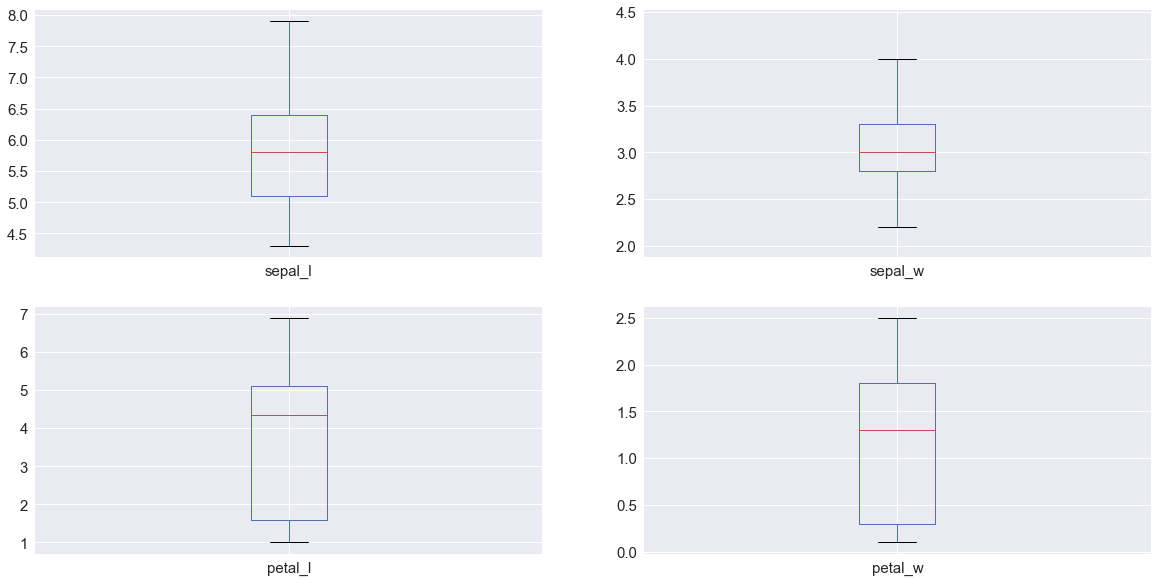

In [25]:
data.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False,figsize=(20,10))

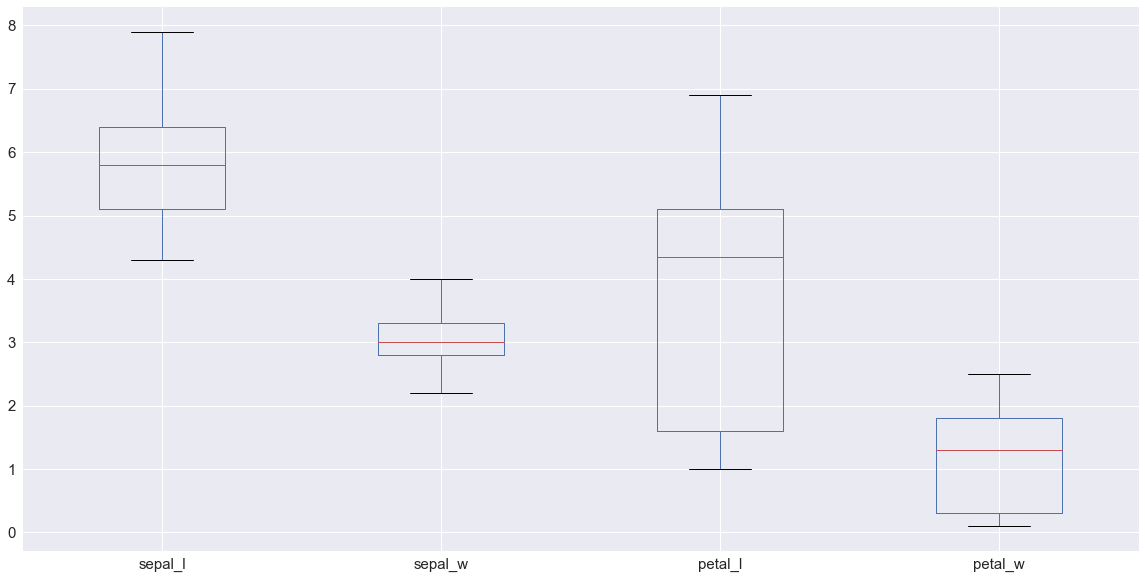

In [26]:
data.plot(kind='box',figsize=(20,10))

Data attributes have different different value distributions, so data standardization may be useful

## Check distributions of attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000122D3741A20>,
      dtype=object)

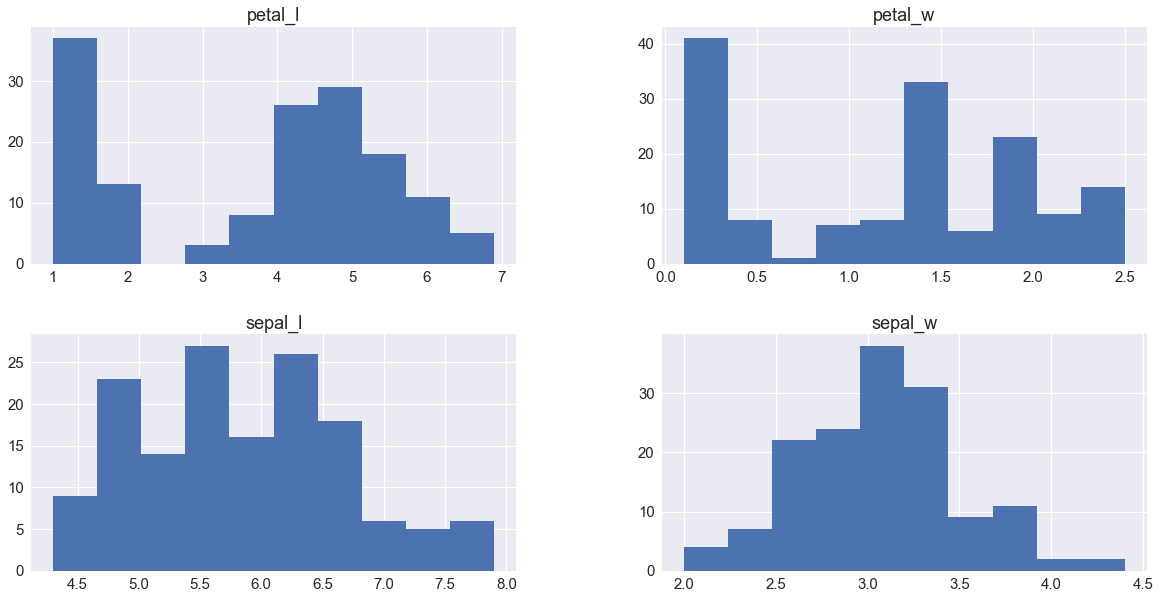

In [27]:
data.hist(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000122D3479668>,
      dtype=object)

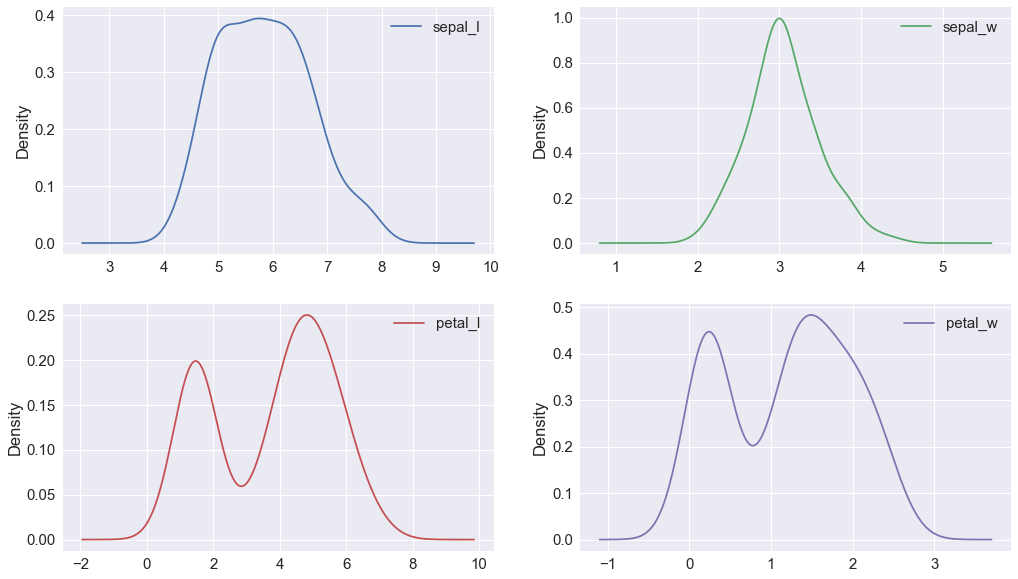

In [28]:
data.plot(kind='density',subplots=True,sharex=False,figsize=(17,10),layout=(2,2))

+ sepal_l and sepal_w seem to have Gaussian distributions
+ petal_l and petal_w seen to have multimodal distributions

# Plot pairplots

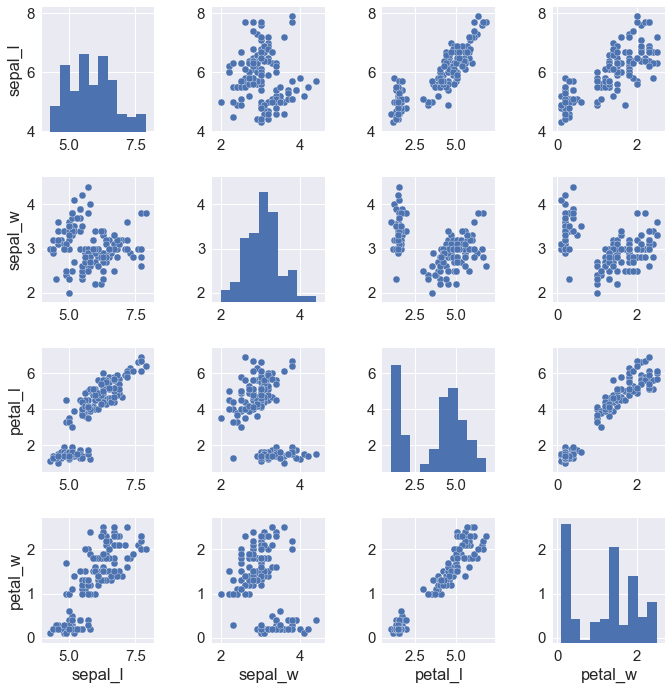

In [29]:
# plt.subplots(figsize=(12,8))
sns.set(font_scale=1.5)
sns.pairplot(data)

# Check correlations

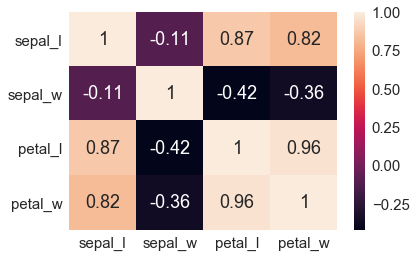

In [30]:
sns.heatmap(data.corr(),annot=True)

Some values are highly correlated

# Evaluate algorithms

## Split the data into training and validation sets

In [31]:
values = data.values
X = values[:,:4]
Y = values[:,-1]

test_size = 0.2
random_state = 7

X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=test_size,random_state=random_state)

# Spot-check algorithms

In [32]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    k_fold = KFold(n_splits=10, random_state=random_state)
    scores = cross_val_score(
        model, X_train, Y_train, cv=k_fold, scoring='accuracy')
    results.append(scores)
    names.append(name)

    print('%s: acc(%.3f%%) std(%.3f%%)' % (name, scores.mean() * 100,
                                           scores.std() * 100))

LR: acc(96.667%) std(4.082%)
LDA: acc(97.500%) std(3.819%)
KNN: acc(98.333%) std(3.333%)
CART: acc(96.667%) std(4.082%)
NB: acc(97.500%) std(5.336%)
SVM: acc(99.167%) std(2.500%)


SVM has the best accuracy

## Select the best model using visualization

In [33]:
df = pd.DataFrame(np.array(results).T,columns=names)

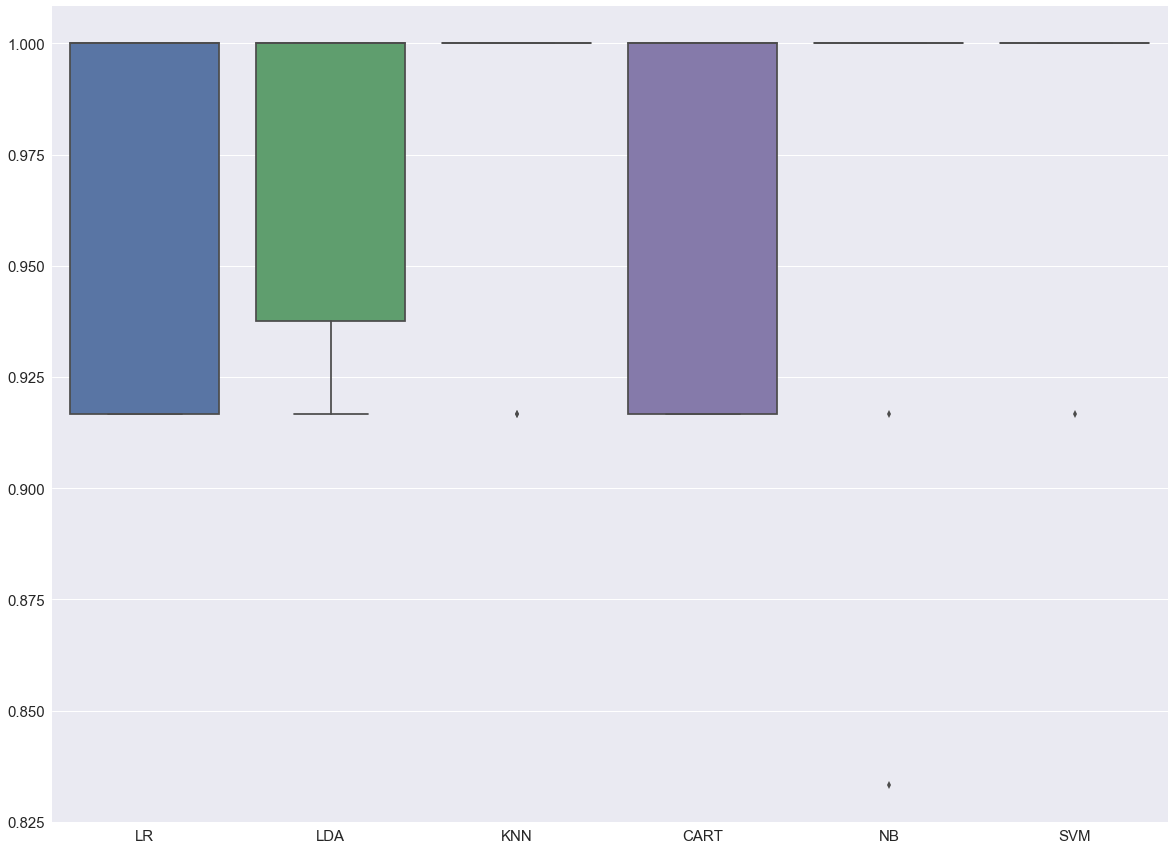

In [36]:
# boxplot 
plt.subplots(figsize=(20,15))
sns.set(font_scale=1.5)
sns.boxplot(data=df)

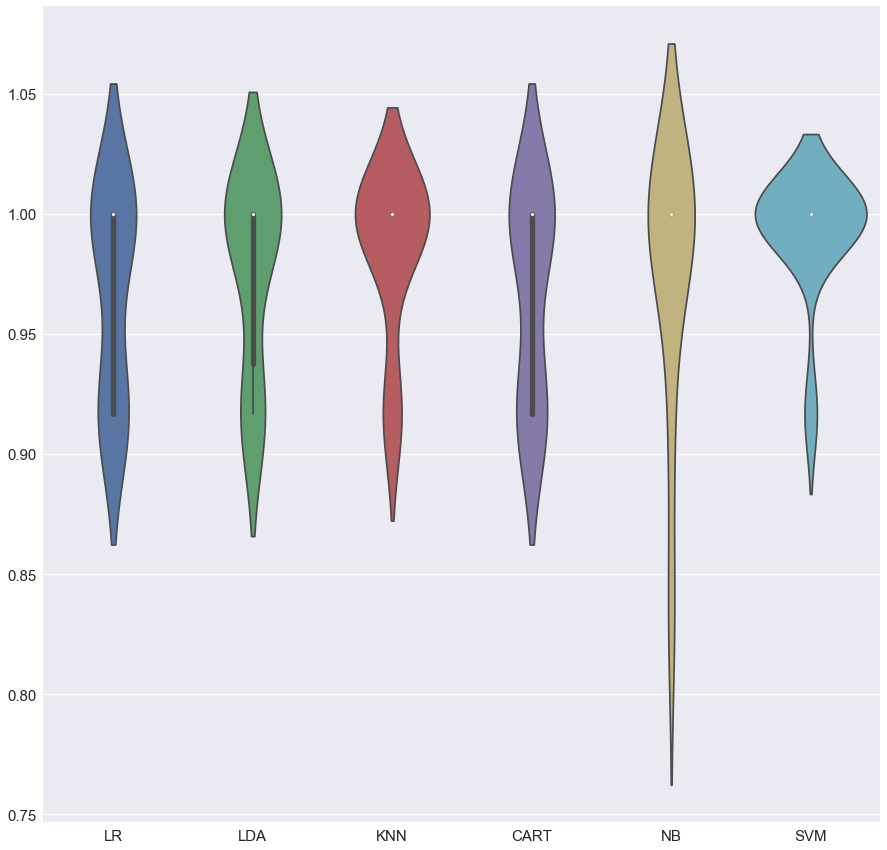

In [37]:
plt.subplots(figsize=(15,15))
sns.violinplot(data=df,scale='area',orient='v')

SVM hav tight accuracy distribution and high accuracy

# Make predictions for KNN

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_val)

print(accuracy_score(Y_pred,Y_val))
print(confusion_matrix(Y_pred,Y_val))
print(classification_report(Y_pred,Y_val))

0.9
[[ 7  0  0]
 [ 0 11  2]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      0.85      0.88        13
 Iris-virginica       0.82      0.90      0.86        10

    avg / total       0.90      0.90      0.90        30



# Visualize confusion matrix

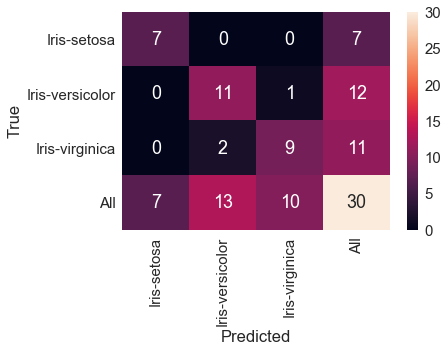

In [40]:
df = pd.crosstab(Y_val, Y_pred,rownames=['True'],colnames=['Predicted'],margins=True)
sns.heatmap(df,annot=True)

# Make predictions for SVM

0.9333333333333333
[[ 7  0  0]
 [ 0 10  0]
 [ 0  2 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.85      0.92        13

    avg / total       0.94      0.93      0.93        30



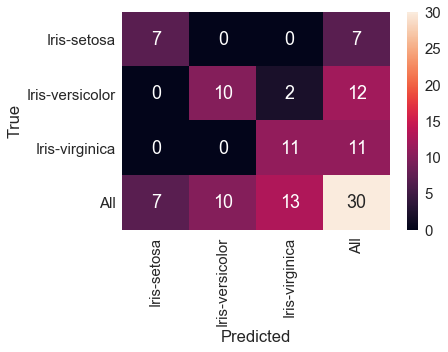

In [44]:
svm = SVC()
svm.fit(X_train,Y_train)
Y_pred = svm.predict(X_val)

print(accuracy_score(Y_pred,Y_val))
print(confusion_matrix(Y_pred,Y_val))
print(classification_report(Y_pred,Y_val))

df = pd.crosstab(Y_val, Y_pred,rownames=['True'],colnames=['Predicted'],margins=True)
sns.heatmap(df,annot=True)

# The final performance is 93%